In [15]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [16]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [17]:
def k2sffreader(ID, campaign):
    
    try:

        k2sfffile = 'K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_'+str(ID)+'-c'+campaign+'_kepler_v1_llc.fits'
        print(k2sfffile)
        
      #  if 'c102' in target:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:19]+'kepler_v1_llc.fits'
      #  else:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:18]+'kepler_v1_llc.fits'

  #      hdul = fits.open('K2SFF_LCs_from_MAST_via_file_upload_form/'+k2sfffile)
         
  #      data=hdul[1].data
    
        data = fits.getdata(k2sfffile, ext=1)
        
#        k2sff_time=hdul[1].data['T']
#        k2sff_fcor=hdul[1].data['FCOR']
#        k2sff_fraw=hdul[1].data['FRAW']

        k2sff_time=data['T']
        k2sff_fcor=data['FCOR']
        k2sff_fraw=data['FRAW']

        
        del data
       # hdul.close()
    


        return k2sff_time, k2sff_fcor, k2sff_fraw
    
    except FileNotFoundError:
        
        return False, False, False

In [18]:
def K2SCzett_SAPandPDCMAPreader(ID, campaign):
    
    try:

        k2scfile = 'hlsp_k2sc_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2_lc.fits'

      #  if 'c102' in target:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2_lc.fits'
      #  else:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2_lc.fits'

        #hdul=fits.open(k2scfile)

        
        
        #data=hdul[1].data
        
        data_ext1 = fits.getdata(k2scfile, ext=1)
        data_ext2 = fits.getdata(k2scfile, ext=2)
        
        k2sc_saptime=data_ext1['TIME'][[data_ext1['quality']][0]==0]    
        k2sc_sapflux=(data_ext1['flux']+data_ext1['trtime']-np.nanmedian(data_ext1['trtime']))[data_ext1['quality'] == 0]

        k2sc_pdcmaptime=data_ext2['TIME'][data_ext2['quality']==0]
        k2sc_pdcmapflux=(data_ext2['flux']+data_ext2['trtime']-np.nanmedian(data_ext2['trtime']))[data_ext2['quality'] == 0]

        #hdul.close()
        

        return k2sc_saptime, k2sc_sapflux, k2sc_pdcmaptime, k2sc_pdcmapflux
    
    except FileNotFoundError:
        
        return False, False, False, False

In [19]:
def SAPandPDCMAPreader(ID, campaign):
    
    try:
    
        sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+str(ID)+'-c'+campaign+'_llc.fits'

      #  if 'c102' in target:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:19]+'llc.fits'
      #  else:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:18]+'llc.fits'

   #     hdul=fits.open(sap_pdcmap_file)
   #     data=hdul[1].data

        data=fits.getdata(sap_pdcmap_file, ext=1)
        
        sapflux=data['SAP_FLUX'][data['SAP_QUALITY']==0]
        saptime=data['TIME'][data['SAP_QUALITY']==0]

        pdcsapflux=data['PDCSAP_FLUX'][data['SAP_QUALITY']==0]
        pdcsaptime=data['TIME'][data['SAP_QUALITY']==0]

        del data
        

    #    hdul.close()
        return sapflux, saptime, pdcsapflux, pdcsaptime
    
    except FileNotFoundError:
        return False, False, False, False

In [20]:
def K2P2reader(ID, campaign):
    
    try:

        #K2P2file=glob.glob('K2P2_attila_scriptjevel/'+target.split('/')[-1].split('_')[0]+'*')[0]

        K2P2file='K2P2_attila_scriptjevel/ktwo'+str(ID)+'-c'+campaign+'_llc.dat'

        df=pd.read_csv(K2P2file,skiprows=14,header=None,sep=r"\s*",engine='python')
        k2p2bjd=df[0][df[5]==0]
        k2p2flux=df[3][df[5]==0]

        del df
        
        return k2p2bjd, k2p2flux
    
    except FileNotFoundError:
        
        return False, False

In [60]:
def everestreader(ID, campaign):
    
    try:

        everestfile='/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2.0_lc.fits'

        print(everestfile)
        print('\n')
        
      #  if 'c102' in target:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2.0_lc.fits'
      #  else:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2.0_lc.fits'


        #hdul = fits.open('EVEREST_LCs_from_MAST_via_file_upload_form/'+everestfile)
        
        data=fits.getdata(everestfile, ext=1)

        time=data['TIME']
        fcor=data['FCOR']
        everest_fraw = data['FRAW']
        quality=np.where(data['QUALITY']==0)    
        
        
        
        #time=hdul[1].data['TIME']
        #fcor=hdul[1].data['FCOR']
        #everest_fraw = hdul[1].data['FRAW']
        #quality=np.where(hdul[1].data['QUALITY']==0)    
        #hdul.close()

        everest_time=time[quality]
        everest_fcor=fcor[quality]

        everest_fraw_time=time

        del data
        
        

        return everest_time, everest_fcor, everest_fraw_time, everest_fraw
    
    except FileNotFoundError:
        
        return False, False, False, False

In [145]:
df=pd.read_csv('kp_mag_search.csv')

class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        
        self.keplermag = float((df[df['EPIC']==str(self.ID)]['KepMag']).values[0])
        
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)
        
        self.k2sff_time, self.k2sff_fcor, self.k2sff_fraw = k2sffreader(self.ID, self.campaign)
        self.k2sc_saptime, self.k2sc_sapflux, self.k2sc_pdcsaptime, self.k2sc_pdcsapflux = K2SCzett_SAPandPDCMAPreader(self.ID, self.campaign)
        self.sapflux, self.saptime, self.pdcsapflux, self.pdcsaptime = SAPandPDCMAPreader(self.ID, self.campaign)
        self.k2p2bjd, self.k2p2flux = K2P2reader(ID, campaign)
        self.everest_time, self.everest_fcor, self.everest_fraw_time, self.everest_fraw = everestreader(self.ID, self.campaign)
        

In [146]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [176]:
targetlist=(
GO6082targets+
GO8037targets+
#GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [180]:
def maxfreq_maxpower(time, flux):
    
    frequency, power = LombScargle(time, flux).autopower()
    #plt.plot(frequency, power)       
    nyquist = len(time)/(2*(max(time)-min(time)))
    #plt.xlim([0,nyquist])
    best_frequency = frequency[np.argmax(power[frequency<nyquist])]
    #print(best_frequency)
    maxpower=np.max(power[frequency<nyquist])
    #print(maxpower)
    
    return best_frequency, maxpower

In [181]:
len(targetlist)

1925

In [182]:
targetlist[0]

'../../GO6082/ktwo212330039-c06_lpd-targ.fits'

In [183]:
targetdict={}

sap_maxpower_list=[]
pdcsap_maxpower_list=[]
k2sc_sap_maxpower_list=[]
k2sc_pdcsap_maxpower_list=[]
k2sff_maxpower_list=[]
k2p2_maxpower_list=[]
everest_maxpower_list=[]
massaap_maxpower_list=[]

kpmaglist=[]

for index, each in enumerate(targetlist):
    
    #if index<1133:
    if True:
    
        print(index/len(targetlist))
        print(index)
        print(each)
        
        ID=each.split('/')[-1].split('-')[0][4:]
        campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

        ourstar=star(ID,campaign)
        
        kpmaglist.append(ourstar.keplermag)
        
        if ourstar.sapflux is not False:
            sap_fund_freq, sap_maxpower = maxfreq_maxpower(ourstar.saptime, ourstar.sapflux)
            sap_maxpower_list.append(sap_maxpower)
        else:
            sap_maxpower_list.append('NODATA')
            
        if ourstar.pdcsapflux is not False:
            pdcsap_fund_freq, pdcsap_maxpower = maxfreq_maxpower(ourstar.pdcsaptime, ourstar.pdcsapflux)
            pdcsap_maxpower_list.append(pdcsap_maxpower)
        else:
            pdcsap_maxpower_list.append('NODATA')
            
        if ourstar.k2sff_fcor is not False:
            k2sff_fund_freq, k2sff_maxpower = maxfreq_maxpower(ourstar.k2sff_time, ourstar.k2sff_fcor)
            k2sff_maxpower_list.append(k2sff_maxpower)
        else:
            k2sff_maxpower_list.append('NODATA')
            
        if ourstar.k2sc_sapflux is not False:
            k2sc_sap_fund_freq, k2sc_sap_maxpower = maxfreq_maxpower(ourstar.k2sc_saptime, ourstar.k2sc_sapflux)
            k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)
        else:
            k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)
            
        if ourstar.k2sc_pdcsapflux is not False:
            k2sc_pdcsap_fund_freq, k2sc_pdcsap_maxpower = maxfreq_maxpower(ourstar.k2sc_pdcsaptime, ourstar.pdcsapflux)
            k2sc_pdcsap_maxpower_list.append(k2sc_pdcsap_maxpower)
        else:
            k2sc_pdcsap_maxpower_list.append('NODATA')
            
        if ourstar.k2p2flux is not False:
            k2p2_fund_freq, k2p2_maxpower = maxfreq_maxpower(ourstar.k2p2bjd, ourstar.k2p2flux)
            k2p2_maxpower_list.append(k2p2_maxpower)
        else:
            k2p2_maxpower_list.append('NODATA')
            
        if ourstar.everest_fcor is not False:
            everest_fund_freq, everest_maxpower = maxfreq_maxpower(ourstar.everest_time, ourstar.everest_fcor)
            everest_maxpower_list.append(everest_maxpower)
        else:
            everest_maxpower_list.append('NODATA')
        
        if ourstar.massaapflux is not False:
            massaap_fund_freq, massaap_maxpower = maxfreq_maxpower(ourstar.massaapbjd, ourstar.massaapflux)
            massaap_maxpower_list.append(massaap_maxpower)
        else:
            massaap_maxpower_list.append('NODATA')

0.0
0
../../GO6082/ktwo212330039-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212330039-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212330039-c06_kepler_v2.0_lc.fits




/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:80: RuntimeWarning: invalid value encountered in subtract
  y = y - np.dot(w, y)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:140: RuntimeWarning: invalid value encountered in multiply
  h = h * np.exp(2j * np.pi * f0 * (t - t0))
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:71: RuntimeWarning: invalid value encountered in multiply
  numerator = y * np.prod(x - ilo - np.arange(M)[:, np.newaxis], 0)


0.0005194805194805195
1
../../GO6082/ktwo229228114-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228114-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228114-c06_kepler_v2.0_lc.fits


0.001038961038961039
2
../../GO6082/ktwo212571112-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571112-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571112-c06_kepler_v2.0_lc.fits


0.0015584415584415584
3
../../GO6082/ktwo229228086-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228086-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228086-c06_kepler_v2.0_lc.fits


0.002077922077922078
4
../../GO6082/ktwo212753920-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fil

0.015064935064935066
29
../../GO6082/ktwo212347262-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212347262-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212347262-c06_kepler_v2.0_lc.fits


0.015584415584415584
30
../../GO6082/ktwo212585135-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212585135-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212585135-c06_kepler_v2.0_lc.fits


0.016103896103896103
31
../../GO6082/ktwo212598683-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212598683-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212598683-c06_kepler_v2.0_lc.fits


0.016623376623376623
32
../../GO6082/ktwo212634341-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.02961038961038961
57
../../GO6082/ktwo212547473-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212547473-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212547473-c06_kepler_v2.0_lc.fits


0.03012987012987013
58
../../GO6082/ktwo229228089-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228089-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228089-c06_kepler_v2.0_lc.fits


0.03064935064935065
59
../../GO6082/ktwo212717166-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212717166-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212717166-c06_kepler_v2.0_lc.fits


0.03116883116883117
60
../../GO6082/ktwo212476743-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_

0.04415584415584416
85
../../GO6082/ktwo212640806-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212640806-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212640806-c06_kepler_v2.0_lc.fits


0.044675324675324674
86
../../GO6082/ktwo212656143-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212656143-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212656143-c06_kepler_v2.0_lc.fits


0.0451948051948052
87
../../GO6082/ktwo212765214-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212765214-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212765214-c06_kepler_v2.0_lc.fits


0.045714285714285714
88
../../GO6082/ktwo212430801-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file

0.0587012987012987
113
../../GO6082/ktwo212733673-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212733673-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212733673-c06_kepler_v2.0_lc.fits


0.05922077922077922
114
../../GO6082/ktwo229228091-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228091-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228091-c06_kepler_v2.0_lc.fits


0.05974025974025974
115
../../GO6082/ktwo212535351-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212535351-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212535351-c06_kepler_v2.0_lc.fits


0.06025974025974026
116
../../GO6082/ktwo212681681-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212597645-c06_kepler_v2.0_lc.fits


0.07324675324675324
141
../../GO6082/ktwo212571247-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571247-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571247-c06_kepler_v2.0_lc.fits


0.07376623376623377
142
../../GO6082/ktwo212555023-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212555023-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212555023-c06_kepler_v2.0_lc.fits


0.07428571428571429
143
../../GO6082/ktwo212789806-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212789806-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_ll

0.08727272727272728
168
../../GO6082/ktwo212291532-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212291532-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212291532-c06_kepler_v2.0_lc.fits


0.0877922077922078
169
../../GO6082/ktwo212463159-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212463159-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212463159-c06_kepler_v2.0_lc.fits


0.08831168831168831
170
../../GO6082/ktwo212824246-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212824246-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212824246-c06_kepler_v2.0_lc.fits


0.08883116883116883
171
../../GO6082/ktwo212726491-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.10181818181818182
196
../../GO6082/ktwo212639395-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212639395-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212639395-c06_kepler_v2.0_lc.fits


0.10233766233766234
197
../../GO6082/ktwo212502064-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212502064-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212502064-c06_kepler_v2.0_lc.fits


0.10285714285714286
198
../../GO6082/ktwo212314501-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212314501-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212314501-c06_kepler_v2.0_lc.fits


0.10337662337662337
199
../../GO6082/ktwo212412494-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.11636363636363636
224
../../GO8037/ktwo220270196-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220270196-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220270196-c08_kepler_v2.0_lc.fits


0.11688311688311688
225
../../GO8037/ktwo220511999-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220511999-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220511999-c08_kepler_v2.0_lc.fits


0.1174025974025974
226
../../GO8037/ktwo229228814-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228814-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228814-c08_kepler_v2.0_lc.fits


0.11792207792207793
227
../../GO8037/ktwo220209683-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.13090909090909092
252
../../GO8037/ktwo220575441-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220575441-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220575441-c08_kepler_v2.0_lc.fits


0.13142857142857142
253
../../GO8037/ktwo220424589-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220424589-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220424589-c08_kepler_v2.0_lc.fits


0.13194805194805195
254
../../GO8037/ktwo229228809-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228809-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228809-c08_kepler_v2.0_lc.fits


0.13246753246753246
255
../../GO8037/ktwo220493201-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.14545454545454545
280
../../GO8037/ktwo220254538-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220254538-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220254538-c08_kepler_v2.0_lc.fits


0.14597402597402598
281
../../GO8037/ktwo220468851-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220468851-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220468851-c08_kepler_v2.0_lc.fits


0.14649350649350648
282
../../GO8037/ktwo220280760-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220280760-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220280760-c08_kepler_v2.0_lc.fits


0.147012987012987
283
../../GO8037/ktwo220244829-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fil

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228778489-c102_kepler_v2.0_lc.fits


0.16
308
../../GO10037/ktwo248369167-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369167-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369167-c102_kepler_v2.0_lc.fits


0.1605194805194805
309
../../GO10037/ktwo201344920-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201344920-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201344920-c102_kepler_v2.0_lc.fits


0.16103896103896104
310
../../GO10037/ktwo201146494-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201146494-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_20

0.17402597402597403
335
../../GO10037/ktwo229177052-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229177052-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229177052-c102_kepler_v2.0_lc.fits


0.17454545454545456
336
../../GO10037/ktwo228921961-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228921961-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228921961-c102_kepler_v2.0_lc.fits


0.17506493506493506
337
../../GO10037/ktwo248369182-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369182-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369182-c102_kepler_v2.0_lc.fits


0.1755844155844156
338
../../GO10037/ktwo248369166-c102_lpd-targ.fits
K2SFF_LCs_fr

0.18805194805194805
362
../../GO10037/ktwo228710407-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228710407-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228710407-c102_kepler_v2.0_lc.fits


0.18857142857142858
363
../../GO10037/ktwo201337319-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201337319-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201337319-c102_kepler_v2.0_lc.fits


0.1890909090909091
364
../../GO10037/ktwo228806239-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228806239-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228806239-c102_kepler_v2.0_lc.fits


0.18961038961038962
365
../../GO10037/ktwo229021597-c102_lpd-targ.fits
K2SFF_LCs_fr

0.20207792207792208
389
../../GO10037/ktwo201342448-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201342448-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201342448-c102_kepler_v2.0_lc.fits


0.2025974025974026
390
../../GO10037/ktwo248369169-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369169-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369169-c102_kepler_v2.0_lc.fits


0.2031168831168831
391
../../GO10037/ktwo228724588-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228724588-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228724588-c102_kepler_v2.0_lc.fits


0.20363636363636364
392
../../GO10037/ktwo228952519-c102_lpd-targ.fits
K2SFF_LCs_fro

0.2161038961038961
416
../../GO10037/ktwo229082399-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229082399-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229082399-c102_kepler_v2.0_lc.fits


0.21662337662337663
417
../../GO10037/ktwo248369133-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369133-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369133-c102_kepler_v2.0_lc.fits


0.21714285714285714
418
../../GO10037/ktwo248369139-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369139-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369139-c102_kepler_v2.0_lc.fits


0.21766233766233767
419
../../GO10037/ktwo229134937-c102_lpd-targ.fits
K2SFF_LCs_fr

0.23012987012987013
443
../../GO10037/ktwo228784317-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228784317-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228784317-c102_kepler_v2.0_lc.fits


0.23064935064935066
444
../../GO10037/ktwo228756284-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228756284-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228756284-c102_kepler_v2.0_lc.fits


0.23116883116883116
445
../../GO10037/ktwo201390991-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201390991-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201390991-c102_kepler_v2.0_lc.fits


0.2316883116883117
446
../../GO10037/ktwo201129022-c102_lpd-targ.fits
K2SFF_LCs_fr

0.24415584415584415
470
../../GO10037/ktwo201133852-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201133852-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201133852-c102_kepler_v2.0_lc.fits


0.24467532467532468
471
../../GO10037/ktwo248369183-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369183-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369183-c102_kepler_v2.0_lc.fits


0.2451948051948052
472
../../GO10037/ktwo248369142-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369142-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369142-c102_kepler_v2.0_lc.fits


0.24571428571428572
473
../../GO10037/ktwo201187587-c102_lpd-targ.fits
K2SFF_LCs_fr

0.2581818181818182
497
../../GO10037/ktwo228995882-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228995882-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228995882-c102_kepler_v2.0_lc.fits


0.2587012987012987
498
../../GO10037/ktwo228964090-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228964090-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228964090-c102_kepler_v2.0_lc.fits


0.25922077922077924
499
../../GO10037/ktwo248369159-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369159-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369159-c102_kepler_v2.0_lc.fits


0.2597402597402597
500
../../GO10037/ktwo248369153-c102_lpd-targ.fits
K2SFF_LCs_from

0.27220779220779223
524
../../GO12111/ktwo251456835-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456835-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456835-c12_kepler_v2.0_lc.fits


0.2727272727272727
525
../../GO12111/ktwo246456572-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246456572-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246456572-c12_kepler_v2.0_lc.fits


0.27324675324675324
526
../../GO12111/ktwo245930016-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_245930016-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_245930016-c12_kepler_v2.0_lc.fits


0.27376623376623377
527
../../GO12111/ktwo246255932-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.28675324675324676
552
../../GO12111/ktwo246459054-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246459054-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246459054-c12_kepler_v2.0_lc.fits


0.2872727272727273
553
../../GO12111/ktwo246256076-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246256076-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246256076-c12_kepler_v2.0_lc.fits


0.28779220779220777
554
../../GO12111/ktwo246283185-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246283185-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246283185-c12_kepler_v2.0_lc.fits


0.2883116883116883
555
../../GO12111/ktwo246136316-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.3012987012987013
580
../../GO12111/ktwo246421164-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246421164-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246421164-c12_kepler_v2.0_lc.fits


0.3018181818181818
581
../../GO12111/ktwo246069268-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246069268-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246069268-c12_kepler_v2.0_lc.fits


0.30233766233766235
582
../../GO12111/ktwo251456127-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456127-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456127-c12_kepler_v2.0_lc.fits


0.3028571428571429
583
../../GO12111/ktwo251456820-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.31584415584415587
608
../../GO12111/ktwo246342589-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246342589-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246342589-c12_kepler_v2.0_lc.fits


0.31636363636363635
609
../../GO12111/ktwo246411315-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246411315-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246411315-c12_kepler_v2.0_lc.fits


0.3168831168831169
610
../../GO12111/ktwo206432153-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_206432153-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_206432153-c12_kepler_v2.0_lc.fits


0.3174025974025974
611
../../GO12111/ktwo246128960-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.3303896103896104
636
../../GO12111/ktwo246078531-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246078531-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246078531-c12_kepler_v2.0_lc.fits


0.33090909090909093
637
../../GO12111/ktwo246003196-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246003196-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246003196-c12_kepler_v2.0_lc.fits


0.3314285714285714
638
../../GO12111/ktwo246084693-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246084693-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246084693-c12_kepler_v2.0_lc.fits


0.33194805194805194
639
../../GO12111/ktwo246356898-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.34493506493506493
664
../../GO12111/ktwo251456807-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456807-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456807-c12_kepler_v2.0_lc.fits


0.34545454545454546
665
../../GO12111/ktwo251456825-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456825-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456825-c12_kepler_v2.0_lc.fits


0.345974025974026
666
../../GO12111/ktwo251456808-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456808-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456808-c12_kepler_v2.0_lc.fits


0.3464935064935065
667
../../GO12111/ktwo246476873-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.35948051948051946
692
../../GO13111/ktwo247050596-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247050596-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247050596-c13_kepler_v2.0_lc.fits


0.36
693
../../GO13111/ktwo246789347-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246789347-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246789347-c13_kepler_v2.0_lc.fits


0.3605194805194805
694
../../GO13111/ktwo247230439-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247230439-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247230439-c13_kepler_v2.0_lc.fits


0.36103896103896105
695
../../GO13111/ktwo246820469-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_f

0.37402597402597404
720
../../GO13111/ktwo210739713-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_210739713-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_210739713-c13_kepler_v2.0_lc.fits


0.37454545454545457
721
../../GO13111/ktwo246623633-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246623633-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246623633-c13_kepler_v2.0_lc.fits


0.37506493506493505
722
../../GO13111/ktwo247359184-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247359184-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247359184-c13_kepler_v2.0_lc.fits


0.3755844155844156
723
../../GO13111/ktwo210872065-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.38857142857142857
748
../../GO13111/ktwo251457023-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251457023-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251457023-c13_kepler_v2.0_lc.fits


0.3890909090909091
749
../../GO13111/ktwo247811730-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247811730-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247811730-c13_kepler_v2.0_lc.fits


0.38961038961038963
750
../../GO13111/ktwo247398225-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247398225-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247398225-c13_kepler_v2.0_lc.fits


0.3901298701298701
751
../../GO13111/ktwo247374553-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.4031168831168831
776
../../GO14058/ktwo251457125-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251457125-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251457125-c14_kepler_v2.0_lc.fits


0.4036363636363636
777
../../GO14058/ktwo248449270-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248449270-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248449270-c14_kepler_v2.0_lc.fits


0.40415584415584416
778
../../GO14058/ktwo248426222-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248426222-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248426222-c14_kepler_v2.0_lc.fits


0.4046753246753247
779
../../GO14058/ktwo248419289-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.4176623376623377
804
../../GO14058/ktwo248728036-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248728036-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248728036-c14_kepler_v2.0_lc.fits


0.41818181818181815
805
../../GO14058/ktwo251457122-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251457122-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251457122-c14_kepler_v2.0_lc.fits


0.4187012987012987
806
../../GO14058/ktwo248619403-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248619403-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248619403-c14_kepler_v2.0_lc.fits


0.4192207792207792
807
../../GO14058/ktwo248520671-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.4322077922077922
832
../../GO14058/ktwo201660573-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201660573-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201660573-c14_kepler_v2.0_lc.fits


0.43272727272727274
833
../../GO14058/ktwo248423737-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248423737-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248423737-c14_kepler_v2.0_lc.fits


0.43324675324675327
834
../../GO14058/ktwo248716706-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248716706-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248716706-c14_kepler_v2.0_lc.fits


0.43376623376623374
835
../../GO14058/ktwo251457120-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.44675324675324674
860
../../GO14058/ktwo248423455-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248423455-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248423455-c14_kepler_v2.0_lc.fits


0.44727272727272727
861
../../GO14058/ktwo248609018-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248609018-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248609018-c14_kepler_v2.0_lc.fits


0.4477922077922078
862
../../GO14058/ktwo248854001-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248854001-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248854001-c14_kepler_v2.0_lc.fits


0.44831168831168833
863
../../GO14058/ktwo248845745-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.4612987012987013
888
../../GO14058/ktwo248765005-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248765005-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248765005-c14_kepler_v2.0_lc.fits


0.4618181818181818
889
../../GO14058/ktwo248624116-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248624116-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248624116-c14_kepler_v2.0_lc.fits


0.4623376623376623
890
../../GO14058/ktwo248793251-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248793251-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248793251-c14_kepler_v2.0_lc.fits


0.46285714285714286
891
../../GO14058/ktwo248765265-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

IndexError: index 0 is out of bounds for axis 0 with size 0

In [184]:
sap_massaap_maxpower_ratio=[]
for index, each in enumerate(sap_maxpower_list):
    try:
        sap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        sap_massaap_maxpower_ratio.append('NODATA')
        
pdcsap_massaap_maxpower_ratio=[]
for index, each in enumerate(pdcsap_maxpower_list):
    try:
        pdcsap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        pdcsap_massaap_maxpower_ratio.append('NODATA')

k2sc_sap_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sc_sap_maxpower_list):
    try:
        k2sc_sap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sc_sap_massaap_maxpower_ratio.append('NODATA')

k2sc_pdcsap_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sc_pdcsap_maxpower_list):
    try:
        k2sc_pdcsap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sc_pdcsap_massaap_maxpower_ratio.append('NODATA')


k2sff_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sff_maxpower_list):
    try:
        k2sff_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sff_massaap_maxpower_ratio.append('NODATA')
        
k2p2_massaap_maxpower_ratio=[]
for index, each in enumerate(k2p2_maxpower_list):
    try:
        k2p2_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2p2_massaap_maxpower_ratio.append('NODATA')
        
everest_massaap_maxpower_ratio=[]
for index, each in enumerate(everest_maxpower_list):
    try:
        everest_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        everest_massaap_maxpower_ratio.append('NODATA')
        

TypeError: data type "NODATA" not understood

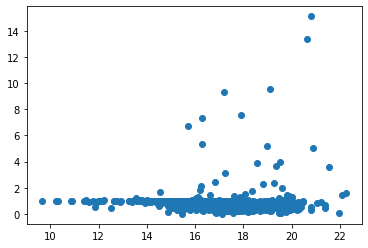

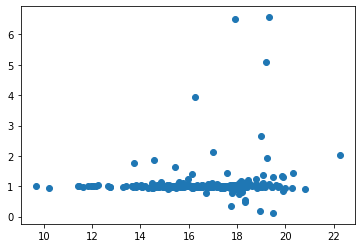

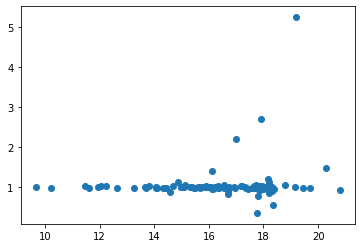

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(sap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(sap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(pdcsap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(pdcsap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sc_sap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sc_sap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sc_pdcsap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sc_pdcsap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sff_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sff_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2p2_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2p2_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(everest_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(everest_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])


In [202]:
[each for index, each in enumerate(k2sc_pdcsap_massaap_maxpower_ratio) if hasattr(each,'dtype')==True]

[nan,
 0.5319562259177649,
 nan,
 0.9841346893322076,
 nan,
 0.9885118179111088,
 nan,
 nan,
 nan,
 1.006002102426958,
 0.9831942431953676,
 nan,
 0.9997321247247938,
 0.9769806393208396,
 nan,
 nan,
 0.9782033761417935,
 nan,
 nan,
 0.9802342541345284,
 nan,
 nan,
 0.9557677006427091,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9666436562307225,
 1.0096596543671879,
 1.0188955183642436,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9762454699849387,
 0.9781642645541957,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.34906551787866935,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9399295473532387,
 nan,
 1.0605657862776674,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9453745966600401,
 nan,
 nan,
 0.9974475001120139,
 1.0306254437627305,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.026995927385715,
 1.005598087615225,
 nan,
 1.0057852935912241,
 nan,
 nan,
 6.5066375783089025,
 0.9884103558349703,
 1.0560193050815425,
 nan,
 0.9831535305844311,
 0.9890054143592477,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0151239966428725,
 nan,
 nan,
 0.9697515610537408,
 na

In [203]:
k2sc_pdcsap_massaap_maxpower_ratio

[nan,
 0.5319562259177649,
 nan,
 0.9841346893322076,
 nan,
 0.9885118179111088,
 nan,
 nan,
 nan,
 1.006002102426958,
 0.9831942431953676,
 nan,
 0.9997321247247938,
 0.9769806393208396,
 nan,
 nan,
 0.9782033761417935,
 nan,
 nan,
 0.9802342541345284,
 nan,
 nan,
 0.9557677006427091,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9666436562307225,
 1.0096596543671879,
 1.0188955183642436,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9762454699849387,
 0.9781642645541957,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.34906551787866935,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9399295473532387,
 nan,
 1.0605657862776674,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9453745966600401,
 nan,
 nan,
 0.9974475001120139,
 1.0306254437627305,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.026995927385715,
 1.005598087615225,
 nan,
 1.0057852935912241,
 nan,
 nan,
 6.5066375783089025,
 0.9884103558349703,
 1.0560193050815425,
 nan,
 0.9831535305844311,
 0.9890054143592477,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0151239966428725,
 nan,
 nan,
 0.9697515610537408,
 na

In [186]:
import matplotlib.gridspec as gridspec


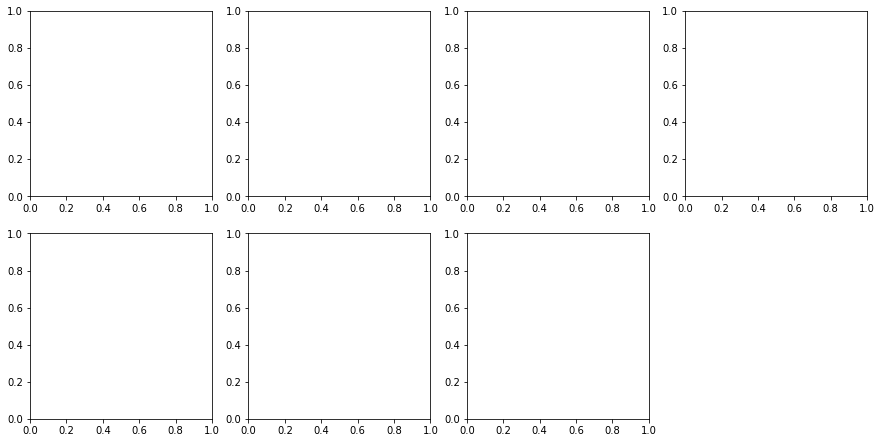

In [187]:
plt.figure(figsize=(15,7.5))
gs = gridspec.GridSpec(2, 4)
ax00 = plt.subplot(gs[0, 0])
ax01 = plt.subplot(gs[0, 1])
ax02 = plt.subplot(gs[0, 2])
ax10 = plt.subplot(gs[0, 3])
ax11 = plt.subplot(gs[1, 0])
ax12 = plt.subplot(gs[1, 1])
ax20 = plt.subplot(gs[1, 2])

In [159]:
[each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==float)]

[]

In [164]:
for index, each in enumerate(kpmaglist):
    print(np.dtype(sap_massaap_maxpower_ratio[index])=='float64')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [157]:
sap_massaap_maxpower_ratio

[0.9881242886403079,
 0.6224503820248364,
 0.8685660133513925,
 0.715101301107609,
 0.946336538970557,
 0.7569709560799305,
 0.8997951063241052,
 0.7784545172596264,
 0.5928689015357658,
 0.9995323831703887,
 0.9831942488559552,
 0.9825669509304543,
 0.7176152900974979,
 0.9193593818088429,
 0.8966320687778814,
 0.7605815178114361,
 0.9048086886421655,
 1.0005084062821057,
 0.9266186655203432,
 0.980234244900104,
 0.9578334026032246,
 0.9600703453659789,
 0.9585390609044113,
 0.9382627206144625,
 0.986951887400946,
 0.9392989201953507,
 0.6888834435435741,
 0.9436419866660357,
 0.9327017578231408,
 0.5470777070219451,
 0.9661651799181482,
 0.9845103764274648,
 1.2212382269144753,
 1.0186880167471941,
 0.9575380912467651,
 0.8555128649344566,
 0.5897029425842454,
 0.9569452975238981,
 1.0295485363478787,
 0.9775700049057872,
 0.8650527823718264,
 0.7235007542433972,
 0.5644856067671747,
 0.6906708244050566,
 0.7877480521427864,
 0.9826718650427726,
 1.0104707413647671,
 0.95984170116851

ValueError: x and y must be the same size

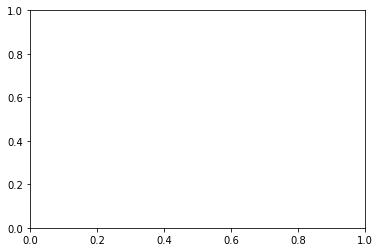

In [151]:
plt.figure()
plt.scatter(kpmaglist,sap_massaap_maxpower_ratio)
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==int)],
            
            [each for index, each in enumerate(sap_massaap_maxpower_ratio) if
             (type(kpmaglist[index])==int)])


plt.figure()
plt.scatter(kpmaglist,pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_sap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sff_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2p2_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,everest_massaap_maxpower_ratio)

In [88]:
ourstar.k2sff_time

array([2384.83104431, 2384.85147667, 2384.87190894, ..., 2463.30967793,
       2463.33010978, 2463.35054164])

In [26]:
ourstar.saptime

array([2384.48369574, 2384.50412811, 2384.52456029, ..., 2463.30967793,
       2463.33010978, 2463.35054164])

In [27]:
ourstar.sapflux

array([423824.9 , 448112.16, 448150.7 , ..., 416707.34, 400536.25,
       387125.38], dtype=float32)

In [28]:
from astropy.stats import LombScargle

In [29]:
!pwd

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo


In [30]:
import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [54]:
frequency, power = LombScargle(ourstar.saptime, ourstar.sapflux).autopower()
#plt.plot(frequency, power)       
nyquist = len(ourstar.saptime)/(2*(max(ourstar.saptime)-min(ourstar.saptime)))
#plt.xlim([0,nyquist])
best_frequency = frequency[np.argmax(power[frequency<nyquist])]
print(best_frequency)
maxpower=np.max(power[frequency<nyquist])
print(maxpower)

1.6267925835097712
0.7038520826726467
